In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sympy import diff, symbols, cos, sin
import random


In [90]:
def my_func(x):
    return np.sin(x*3) + np.cos(2*x) + np.sin(x**2)

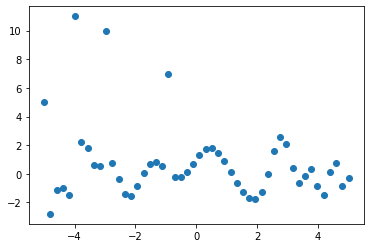

In [95]:
x = np.linspace(-5, 5, 50)
y = my_func(x) #+ np.sin(x * 25.5)

y [10] = 10.
y [20] = 7.
y [0] = 5.
y [5] = 11.

plt.plot(x, y, 'o')

In [56]:
from scipy.misc import derivative

In [57]:
def grad(fun, x_0, alpha, eps):
    x = 1000
    x_l = list()
    x_l.append(x_0)
    while (1):
        if abs(x - x_0) < eps:
            break
        x = x_0
        x_0 = x - alpha * derivative(fun, x,  dx=1e-6)
        x_l.append(x_0)
    return x, np.array(x_l)

In [58]:
def find_global(fun, alpha, eps, a, b, size):
    m=10000
    newArray = np.random.randint(a*m, b*m, size)/m
    gl = fun(newArray[0])
    print(newArray)
    for el in newArray:
        x1, _ = grad(fun, el, alpha, eps)
        
        if (fun(x1) < gl):
            gl = x1
            
    return gl


In [59]:
from scipy.optimize import minimize

In [60]:
x0 = -1
res = minimize(my_func, x0, method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: -0.259419
         Iterations: 28
         Function evaluations: 56
[-0.60685128]


In [61]:
my_min, x_l = grad(my_func, x0, 0.001, 1e-8)
my_min

-0.6068524234324737

In [62]:
my_func(my_min)

-0.25941902688099877

In [63]:

y_l = my_func(x_l)

In [74]:
gl = find_global(my_func, alpha=0.001, eps=1e-8, a=-5, b=4, size=100)
gl

[ 0.1068  1.7241 -4.9577  1.6999 -2.9692  0.7377 -0.0658 -4.634   3.3181
 -4.4965 -1.2371 -4.752  -2.8419 -4.45   -2.9264  2.8226  2.1255  0.5944
  1.0015 -0.7349 -4.3929  1.4608 -4.1411 -3.1484 -2.9093 -4.1707  1.2614
  3.0421 -2.6537  1.548   2.6606  1.1982 -1.9445 -4.2065  1.2658 -1.9324
 -2.3444  2.3517  2.2388  3.2155 -1.0493 -2.5562  1.6434  2.6195  3.3883
 -0.397   1.543   1.7012  1.8691 -2.5765 -2.1679 -1.3211  3.9269 -1.3356
 -3.6934  0.4412  2.9495  3.4565 -2.5544 -3.7653  2.4346 -2.1415 -4.0902
 -2.1629 -3.5258  2.2083  1.5644 -2.1665 -3.2526  3.1144  1.7485 -0.3182
 -2.1159 -2.2133 -0.9441  0.7252 -0.6044  3.7552 -0.3789  3.5739 -2.0467
 -1.2899 -1.0851 -3.188   3.1741 -1.2526 -0.6651  1.4395 -3.1408 -1.2157
  3.9924 -0.5358 -0.4759 -0.1274  1.5147 -1.5337  3.2456 -3.3874  0.7165
 -2.4142]


-4.837035630244892

In [75]:
my_func(gl)

-2.8863956145210095

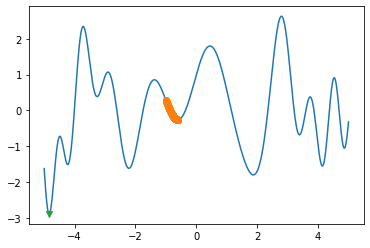

In [76]:
plt.plot(x, y)
plt.plot(x_l, y_l, 'o')
plt.plot(gl, my_func(gl),'v')

In [67]:
my_func(gl)

-0.6783311992185932